# Applications of Artificial Intelligence in Physics

## Abstract

In 2012 the discovery of the Higgs Boson was announced after a long and arduous process of sifting through a extremely large amount of Proton Proton collisions at different energy levels. The nobel prize was later awarded for this significant discovery in understanding our Universe. But for Physicists this is not where the investigation stops, this is just the start. Now there is the long and difficult quest to measure its characteristics and determine how the Higgs Boson fits into our current standard model of the Universe.

A key property of any particle is how often it decays into other particles. ATLAS is a particle physics experiment taking place at the Large Hadron Collider at CERN that searches for new particles and processes using head-on collisions of protons of extraordinarily high energy. The ATLAS experiment has recently observed a signal of the Higgs boson decaying into two tau particles, but this decay is a small signal buried in background noise.

As part of a collaborative and open approach CERN (ATLAS and CMS) developed a Kaggle competition to explore the knowledge of advanced machine learning, and deep learning techniques to imporve the discover significance of the experiment. The best thing is no knowledge of Particle Physics is required, however if you do wish to get into the detail of the physics behind the Higgs Mechanism I would be happy to share content. The goal of this project is using simulated data with features characterizing events detected by ATLAS, to classify events into 'Tau Tau decays of the Higgs Boson' versus 'background'.

Below is also a link to the Kaggle Competition should you also wish to take part.\
https://www.kaggle.com/c/higgs-boson

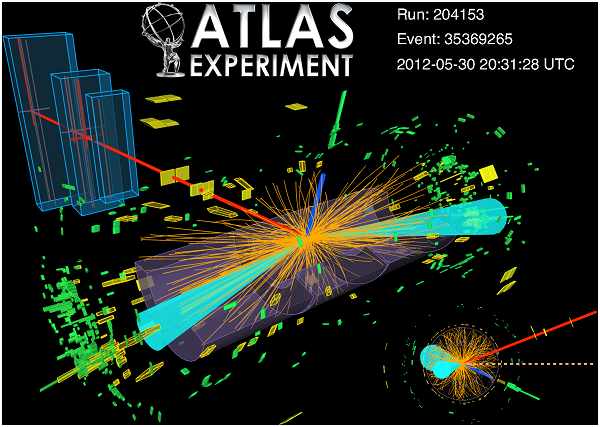

In [1]:
from IPython.display import Image
Image("https://storage.googleapis.com/kaggle-competitions/kaggle/3887/media/ATLASEXP_image.png")

## Data Overview

<b>training.csv</b> - Training set of 250000 events, with an ID column, 30 feature columns, a weight column and a label column. We will be splitting this data into a train and test dataset so we can monitor the performance of the model.
There is also a test dataset but it has no weight or label so we will not be using that dataset as it is for submission.

Futher detail about the dataset can be found in the link below but a summary of the variables within the dataset can be seen below.
https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

Field Name          | Description     |
:-------------------|:---------------:|
**EventId**         | *An unique integer identifier of the event. Not to be used as a feature.*   | 
**DER mass MMC**         | *The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration (may be undefined if the topology of the event is too far from the expected topology)*   | 
**DER mass transverse met lep**         | *The transverse mass (21) between the missing transverse energy and the lepton.*   | 
**DER mass vis**         | *The invariant mass (20) of the hadronic tau and the lepton.*   | 
**DER pt h**         | *The modulus (19) of the vector sum of the transverse momentum of the hadronic tau, the lepton, and the missing transverse energy vector*   | 
**DER deltaeta jet jet**         | * The absolute value of the pseudorapidity separation (22) between the two jets (undefined if PRI jet num ≤ 1).*   | 
**DER mass jet jet**         | *The invariant mass (20) of the two jets (undefined if PRI jet num ≤ 1).*   | 
**DER prodeta jet jet**         | *The product of the pseudorapidities of the two jets (undefined if PRI jet num ≤1).*   | 
**DER deltar tau lep**         | *The R separation (23) between the hadronic tau and the lepton.*   | 
**DER pt tot**         | *The modulus (19) of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥ 1) and the subleading jet (if PRI jet num = 2) (but not of any additional jets).*   | 
**DER sum pt**         | *The sum of the moduli (19) of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥ 1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3).*   | 
**DER pt ratio lep tau**         | *The ratio of the transverse momenta of the lepton and the hadronic tau*   | 
**DER met phi centrality**         | *The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton C =A+B/√A2+B2,where A = sin(φmet − φlep), B = sin(φhad − φmet), and φmet, φlep, and φhad are the azimuthal angles of the missing transverse energy vector, the lepton, and the hadronic tau,respectively. The centrality is √2 if the missing transverse energy vector ~E miss T is on the bisector of the transverse momenta of the lepton and the hadronic tau. It decreases to 1 if ~E miss T is collinear with one of these vectors and it decreases further to − √2 when ~E miss T is exactly opposite to the bisector.*   | 
**DER lep eta centrality**         | *The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI jet num ≤ 1) exp " −4/(η1 − η2)^2(ηlep − ((η1 + η2)/2)^2), where ηlep is the pseudorapidity of the lepton and η1 and η2 are the pseudorapidities of the two jets. The centrality is 1 when the lepton is on the bisector of the two jets, decreases to 1/e when it is collinear to one of the jets, and decreases further to zero at infinity.*   | 
**PRI tau pt**         | *The transverse momentum sqrt(p^2(x)+p^2(y) of the hadronic tau.*   | 
**PRI tau eta**         | *The pseudorapidity η of the hadronic tau.*   | 
**PRI tau phi**         | *The azimuth angle φ of the hadronic tau.*   | 
**PRI lep pt**         | *An unique integer identifier of the event. Not to be used as a feature.*   | 
**PRI lep eta**         | *The pseudorapidity η of the lepton.*   | 
**PRI lep phi**         | *The azimuth angle φ of the lepton*   | 
**PRI met**         | *The missing transverse energy ~E miss T.*   | 
**PRI met phi**         | *The azimuth angle φ of the missing transverse energy*   | 
**PRI met sumet**         | *The total transverse energy in the detector.*   | 
**PRI jet num**         | *The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3).*   | 
**PRI jet leading pt**         | *The transverse momentum sqrt(p^2(x) + p^2(y) of the leading jet, that is the jet with largest transverse momentum (undefined if PRI jet num = 0).*   |
**PRI jet leading eta**         | *The pseudorapidity η of the leading jet (undefined if PRI jet num = 0).*   | 
**PRI jet leading phi**         | *The azimuth angle φ of the leading jet (undefined if PRI jet num = 0).*   | 
**PRI jet subleading pt**         | *The transverse momentum sqrt(p^2(x) + p^2(y) of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI jet num ≤ 1).*   | 
**PRI jet subleading eta**         | *The pseudorapidity η of the subleading jet (undefined if PRI jet num ≤ 1).*   |
**PRI jet subleading phi**         | *The azimuth angle φ of the subleading jet (undefined if PRI jet num ≤1).*   |
**PRI jet all pt**         | *The scalar sum of the transverse momentum of all the jets of the events.*   |
**Weight**         | *The event weight w(i), explained in Section 3.3. Not to be used as a feature. Not available in the test sample.*   |
**Label**         | *The event label (string) yi ∈ {s, b} (s for signal, b for background). Not to be used as a feature. Not available in the test sample.*   |

variables prefixed with <b>PRI</b> (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.

variables prefixed with <b>DER</b> (for DERived) are quantities computed from the primitive features, which were selected by  the physicists of ATLAS

It can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os, types
from botocore.client import Config
import ibm_boto3
pd.set_option('display.max_columns', None)

In [2]:
# Loading the data
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_85bce7e04e4148c5b7838dfeff8b1177 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_85bce7e04e4148c5b7838dfeff8b1177 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_85bce7e04e4148c5b7838dfeff8b1177 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QKA5ls9pA7VdUrMRq6TvPsSKRGXzsCE7_hayZlVlHI2b',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_85bce7e04e4148c5b7838dfeff8b1177)

body = client_85bce7e04e4148c5b7838dfeff8b1177.get_object(Bucket='aiinphysics-donotdelete-pr-pzwlkedrwljvlg',Key='training.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
train_df = pd.read_csv(body)

In [4]:
print("train_df.shape: ", str(train_df.shape))

train_df.shape:  (250000, 33)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

<b> Checking for Nulls and then -999 values </b>

<AxesSubplot:>

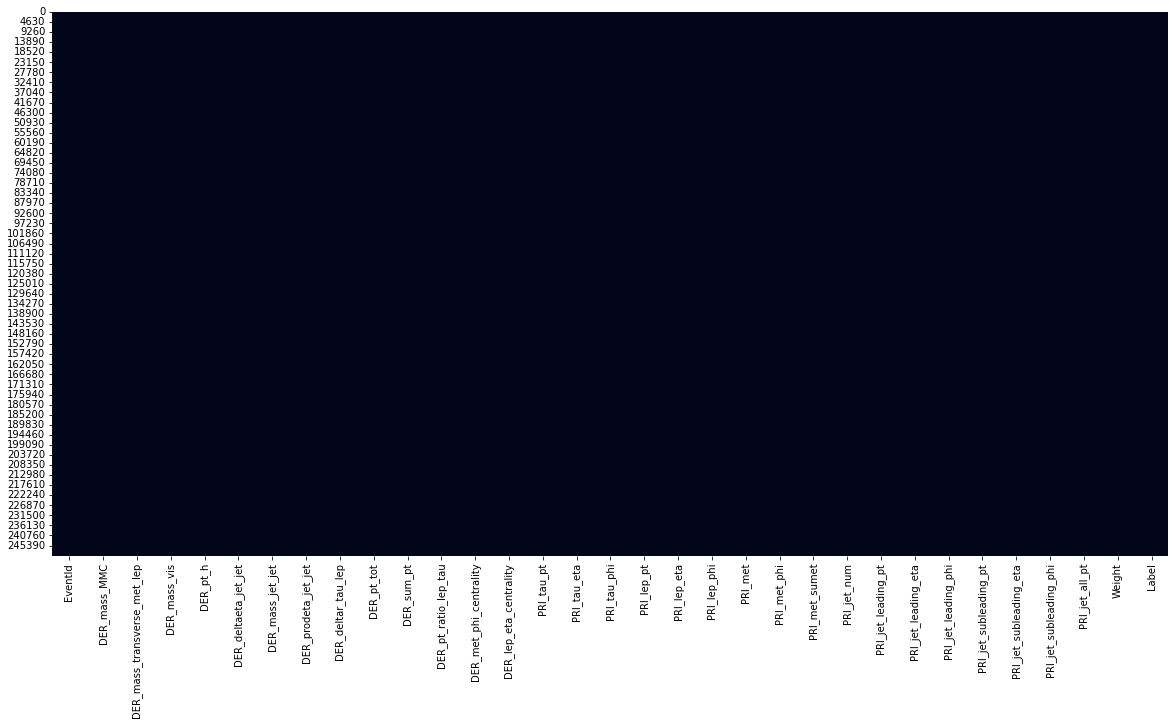

In [5]:
#Checking missing Data
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isnull(), cbar=False)

Good sign. We have no missing values which hopefully means they were filled with -999.

<AxesSubplot:>

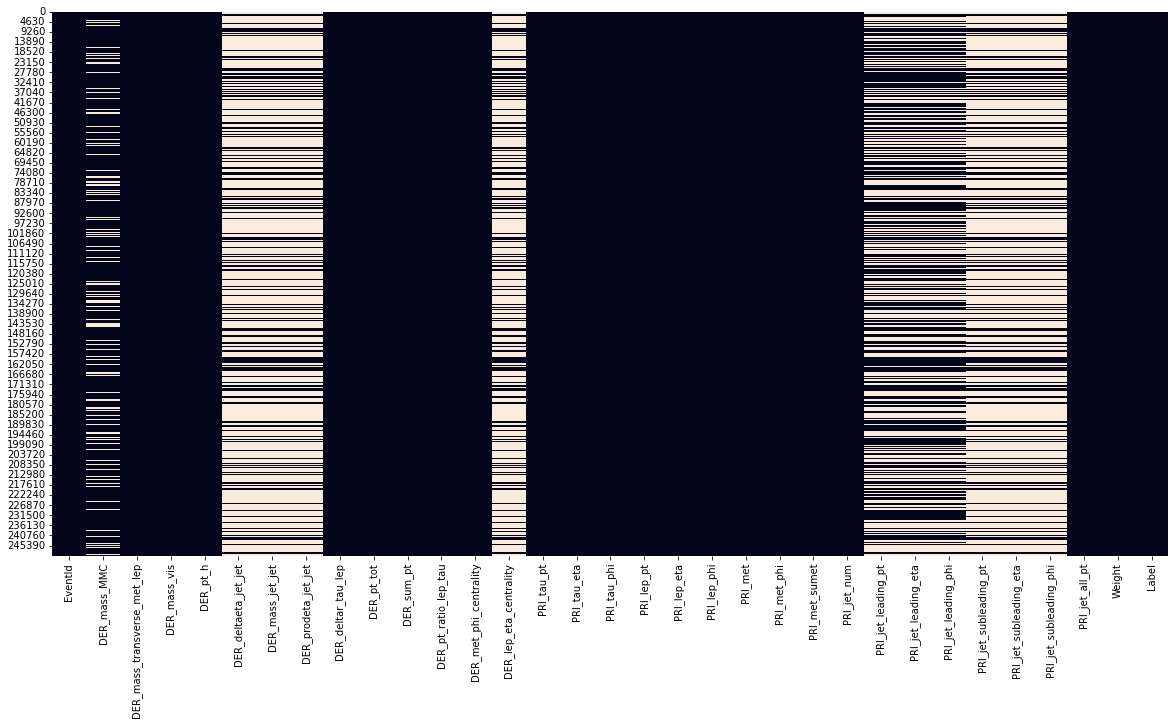

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df==-999, cbar=False)

<Figure size 1440x720 with 0 Axes>

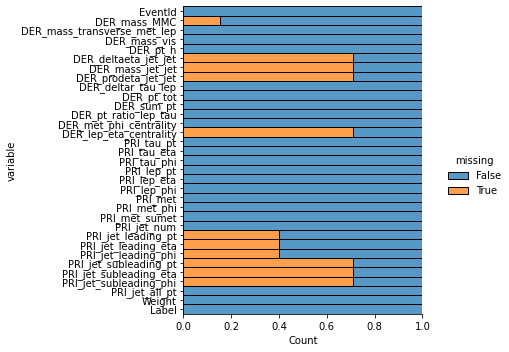

In [8]:
plt.figure(figsize=(20,10))
sns.displot(
    data=(train_df==-999).melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

We can see from the above that the following columns have missing values:
- DER_mass_MCC - The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration (may be undefined if the topology of the event is too far from the expected topology)
- DER_deltaeta_jet_jet - * The absolute value of the pseudorapidity separation (22) between the two jets (undefined if PRI jet num ≤ 1).*
- DER_mass_jet_jet - The invariant mass (20) of the two jets (undefined if PRI jet num ≤ 1).
- DER_prodeta_jet_jet - The product of the pseudorapidities of the two jets (undefined if PRI jet num ≤1).
- DER_lep_eta_centrality - The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI jet num ≤ 1) exp " −4/(η1 − η2)^2(ηlep − ((η1 + η2)/2)^2), where ηlep is the pseudorapidity of the lepton and η1 and η2 are the pseudorapidities of the two jets. The centrality is 1 when the lepton is on the bisector of the two jets, decreases to 1/e when it is collinear to one of the jets, and decreases further to zero at infinity.
- PRI_jet_leading_pt - The transverse momentum sqrt(p^2(x) + p^2(y) of the leading jet, that is the jet with largest transverse momentum (undefined if PRI jet num = 0).
- PRI_jet_leading_eta - The pseudorapidity η of the leading jet (undefined if PRI jet num = 0).
- PRI_jet_leading_phi - The azimuth angle φ of the leading jet (undefined if PRI jet num = 0).
- PRI_jet_subleading_pt - The transverse momentum sqrt(p^2(x) + p^2(y) of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI jet num ≤ 1).
- PRI_jet_subleading_eta - The pseudorapidity η of the subleading jet (undefined if PRI jet num ≤ 1).
- PRI_jet_subleading_phi - The azimuth angle φ of the subleading jet (undefined if PRI jet num ≤1).

11 out of the 30 variables we have available to ask. The question we must ask ourselves is the missing data meaningful or should we imput some values. To get the answer to this question we must first understand these variables.\
It appears that most of these cases are due to the case where there is <= 1 jet in which case most of these variables cannot be created as two are required, and at least 1 is required for the leading momentum and angles. For this 
reason it does not make any sense to impute any data.

In [5]:
train_df[train_df.DER_deltaeta_jet_jet==-999]['PRI_jet_num'].value_counts()

0    99913
1    77544
Name: PRI_jet_num, dtype: int64

<b> Creating Test and Train datasets </b>

In [7]:
from sklearn.model_selection import train_test_split
columns = train_df.columns
x_columns = list(columns[:-2])
y_columns = ['EventId'] + list(train_df.columns[-2:])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_df[x_columns], train_df[y_columns], test_size=0.33, random_state=42)

In [9]:
print('X_train shape ',X_train.shape)
print('X_test shape ',X_test.shape)
print('y_train shape ',y_train.shape)
print('y_test shape ',y_test.shape)

X_train shape  (167500, 31)
X_test shape  (82500, 31)
y_train shape  (167500, 3)
y_test shape  (82500, 3)


<b> Exploring the Deimensionality of our dataset through PCA </b>

Recall that PCA will do a matrix decomposition of this data to find the eigenvalues - these eigenvalues will be the principal components of the data, or the "latent features" that describe a maximal amount of variance in the data.

In [10]:
# PCA works better if our features are scaled, so let's do that.
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(X_train[X_train.columns[1:]])
x_train_scaled = s.transform(X_train[X_train.columns[1:]])

In [11]:
from sklearn.decomposition import PCA
# n_components - number of components we want to reduce our data by
def mnist_pca(x_data, n_components):
    pca = PCA(n_components=n_components)
    fit_pca = pca.fit(x_data)
    print("Variance explained with {0} components:".format(n_components), 
          round(sum(fit_pca.explained_variance_ratio_), 2))
    return fit_pca, fit_pca.transform(x_data)

In [12]:
pca_full, mnist_data_full = mnist_pca(x_train_scaled, 30)

Variance explained with 30 components: 1.0


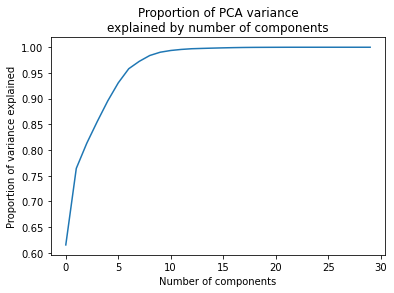

In [13]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title("Proportion of PCA variance\nexplained by number of components")
plt.xlabel("Number of components")
plt.ylabel("Proportion of variance explained");

We need about 10 components to explain over 95% of the variance in the data. Thats a third of our original featureset.

In [14]:
pca_2, mnist_data_2 = mnist_pca(x_train_scaled, 10)

Variance explained with 10 components: 0.99


In [ ]:
# Dont forget to do PCA aswell as Data analysis